In [1]:
from src.data.load_final_data import load_final_movies_and_reviews
from src.utils.initial_plots_data import plot_movies_over_time_months, plot_movies_over_time_years, plot_pie_genres_proportion, plot_donut_top_countries

# Make sure that if any dependencies changes it will be reflected in the notebook (From the ML course)
%load_ext autoreload
%autoreload 2

#### Scripts to create and process our datasets 
(We do not recommand running theses functions. We ran some of them for multiple days):

Load movie metadata:

`df_movies_metadata, df_movies_language, df_movies_countries, df_movies_genres = load_and_clean_movies_df()`

Load movie reviews from kaggle:

`df_reviews_kaggle = load_movie_reviews_kaggle(df_movies_metadata)`

Load mapping IMDB id to wikipedia ID:

`df_mapping_imdb_id_wikipedia_id = load_imdb_id_wikipedia_id(df_movies_metadata)`

Load movie average reviews from the non-commercial IMDB:

`df_imdb_average_reviews = load_imdb_average_reviews(df_mapping_imdb_id_wikipedia_id)`

#### Predict emotions

Compute plot emotions:

`predict_emotions_to_csv(df_movies_metadata, column_to_predict='plot', csv_path='plot_emotions.csv')`

Merging df_movies with plot_emotions.csv:

`df_movies_with_emotions = merge_df_movies_with_emotions_csv(df_movies_metadata, csv_path='plot_emotions.csv')`

#### Scrap more years and months:
We scrap our years and months data using:

`scrap_years_months_movies(df_movies_metadata)`

Then we load the resulting csv and combine both data (from both the original dataset and scrapped data):

`get_final_dates(pd.read_csv("dates_scraped.csv"))`

#### Scrap more reviews:

`scrape_reviews(df_mapping_imdb_id_wikipedia_id)`

# Scripts to create and load our final data
Note: You need at least the files 'final_movies.csv' and 'final_reviews.csv' and 'movie.metadata.tsv' (More information in the README)

In [2]:
df_movies, df_language, df_countries, df_genres, df_reviews = load_final_movies_and_reviews()

In [3]:
print("Our dataset has {} different movies".format(len(df_movies)))
print("Without combining any genres, we have {} different genres".format(df_genres.shape[1]))
print("We also have {} different countries".format(df_countries.shape[1]))
print("Finally, we have {} different languages".format(df_language.shape[1]))

Our dataset has 11564 different movies
Without combining any genres, we have 336 different genres
We also have 105 different countries
Finally, we have 151 different languages


#### Let have a look at the movies released over time in our data set

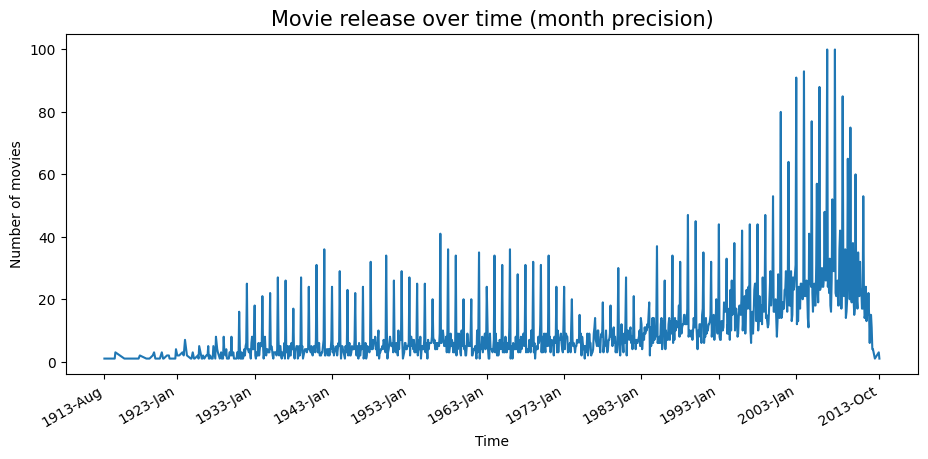

<Figure size 640x480 with 0 Axes>

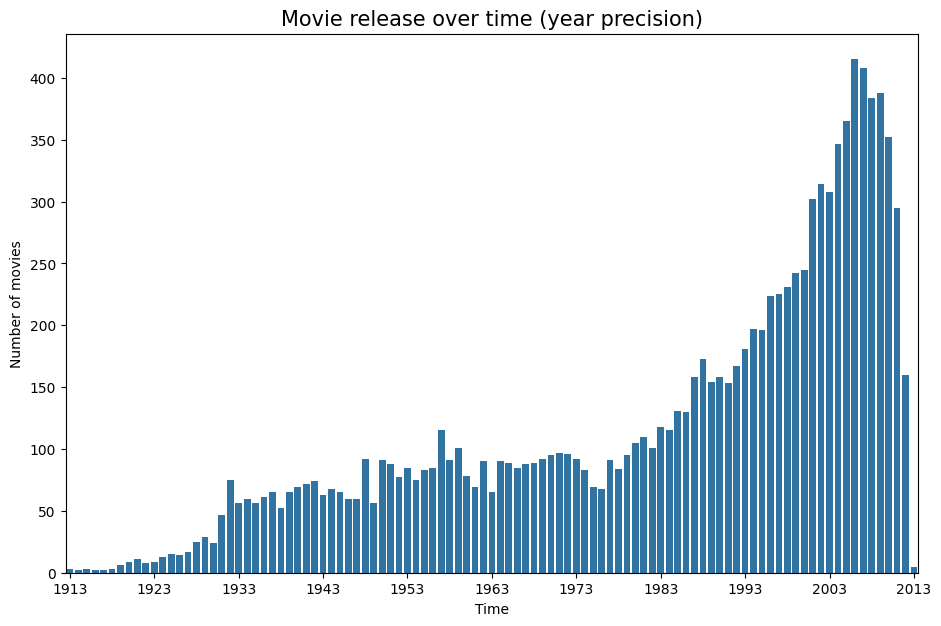

In [4]:
plot_movies_over_time_months(df_movies)
plot_movies_over_time_years(df_movies)

#### Now let's look at the different genres present

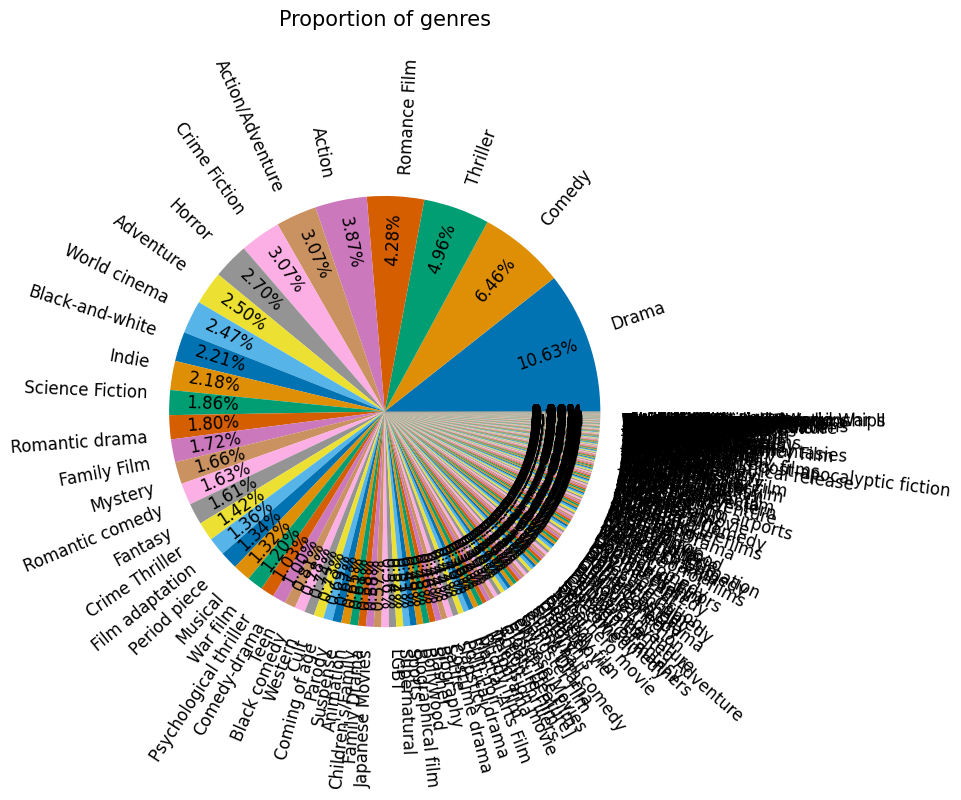

In [5]:
# Waiting the aggregated genres
plot_pie_genres_proportion(df_genres)

#### Then let's have a look at the top 10 countries

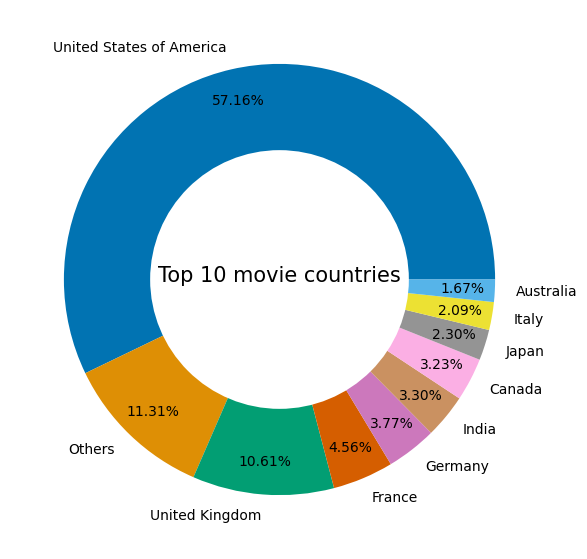

In [6]:
plot_donut_top_countries(df_countries, top=10)

As we can see, the United States of America and the United Kingdom takes together more than 65 % of the appearing countries in our dataset
Let's look at this dunot chart without considering both of theses

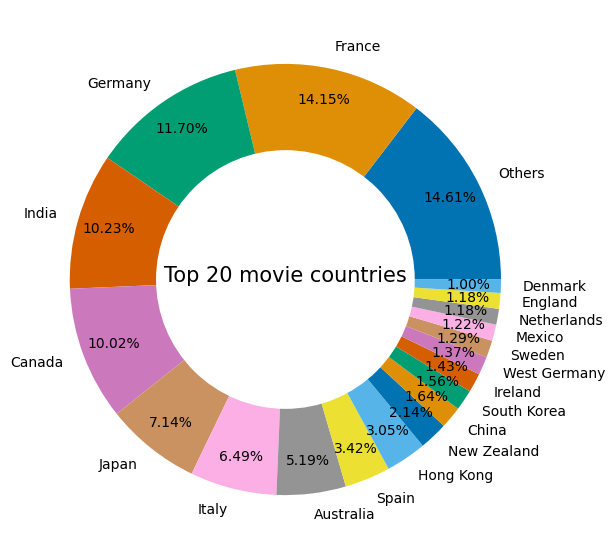

In [7]:
plot_donut_top_countries(df_countries, top=20, exclude_countries=["United States of America", "United Kingdom"])